In [2]:
import pandas as pd

df_1014 = pd.read_excel("2010-2014IPD-OPD-Deaths.xls", header=1)
df_1519 = pd.read_excel("2015-2019IPD-OPD-Deaths.xls", header=1)
df_2025 = pd.read_excel("2020-2025IPD-OPD-Deaths.xls", header=1)

print(df_1014.head())
print(df_1519.head())
print(df_2025.head())

     orgunitlevel1      orgunitlevel2 orgunitlevel3  \
0  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
1  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
2  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
3  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
4  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   

                         orgunitlevel4                 organisationunitname  \
0  African Bible College Health Centre  African Bible College Health Centre   
1  African Bible College Health Centre  African Bible College Health Centre   
2  African Bible College Health Centre  African Bible College Health Centre   
3  African Bible College Health Centre  African Bible College Health Centre   
4  African Bible College Health Centre  African Bible College Health Centre   

      periodname  NMCP IPD Confirmed Malaria Cases  \
0   January 2014                              67.0   
1  February 2014                              20.0   
2     March 2014                

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df_merged_incidence = pd.concat([df_1014, df_1519,df_2025], ignore_index = True)
print(df_merged_incidence.head())
print(df_merged_incidence.shape)

     orgunitlevel1      orgunitlevel2 orgunitlevel3  \
0  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
1  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
2  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
3  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
4  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   

                         orgunitlevel4                 organisationunitname  \
0  African Bible College Health Centre  African Bible College Health Centre   
1  African Bible College Health Centre  African Bible College Health Centre   
2  African Bible College Health Centre  African Bible College Health Centre   
3  African Bible College Health Centre  African Bible College Health Centre   
4  African Bible College Health Centre  African Bible College Health Centre   

      periodname  NMCP IPD Confirmed Malaria Cases  \
0   January 2014                              67.0   
1  February 2014                              20.0   
2     March 2014                

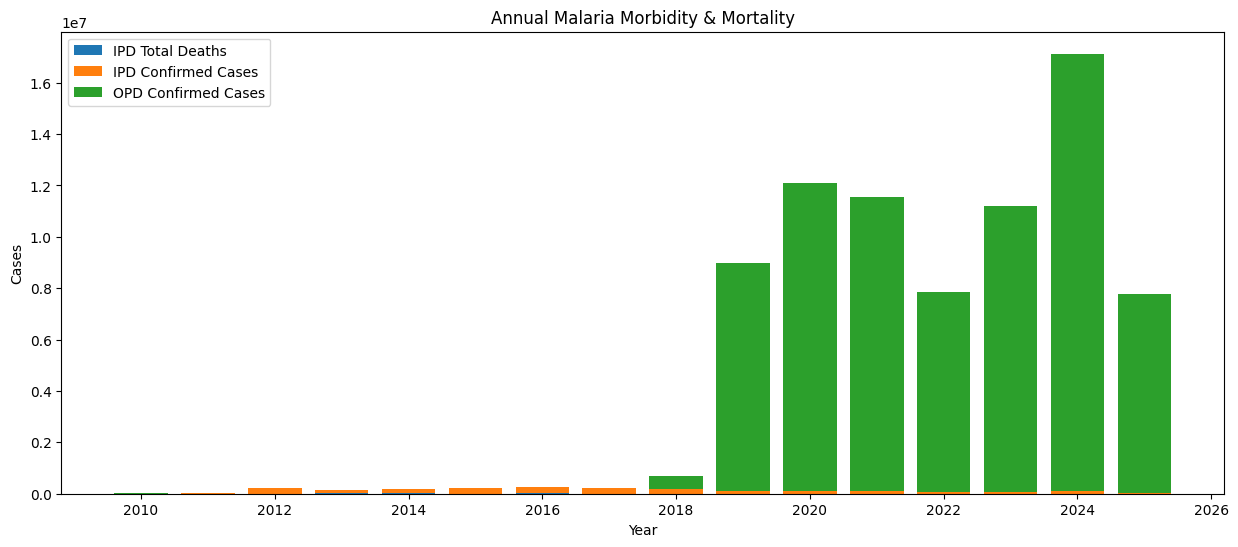

In [21]:


# Converting the column 'periodname' to datetime
df_merged_incidence['date_col'] = pd.to_datetime(df_merged_incidence['periodname'], format='%B %Y')

# Extracting just the year
df_merged_incidence['Year'] = df_merged_incidence['date_col'].dt.year

# Aggregate yearly totals
yearly_cases = df_merged_incidence.groupby('Year', as_index=False).sum(numeric_only=True)

# Plot
plt.figure(figsize=(15,6))

plt.bar(yearly_cases["Year"], yearly_cases["NMCP IPD Total Malaria Deaths"], label="IPD Total Deaths")
plt.bar(yearly_cases["Year"], yearly_cases["NMCP IPD Confirmed Malaria Cases"], 
        bottom=yearly_cases["NMCP IPD Total Malaria Deaths"], label="IPD Confirmed Cases")
plt.bar(yearly_cases["Year"], yearly_cases["NMCP OPD Confirmed Malaria Cases"], 
        bottom=yearly_cases["NMCP IPD Total Malaria Deaths"] + yearly_cases["NMCP IPD Confirmed Malaria Cases"], 
        label="OPD Confirmed Cases")

plt.title("Annual Malaria Morbidity & Mortality")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.legend()
plt.show()


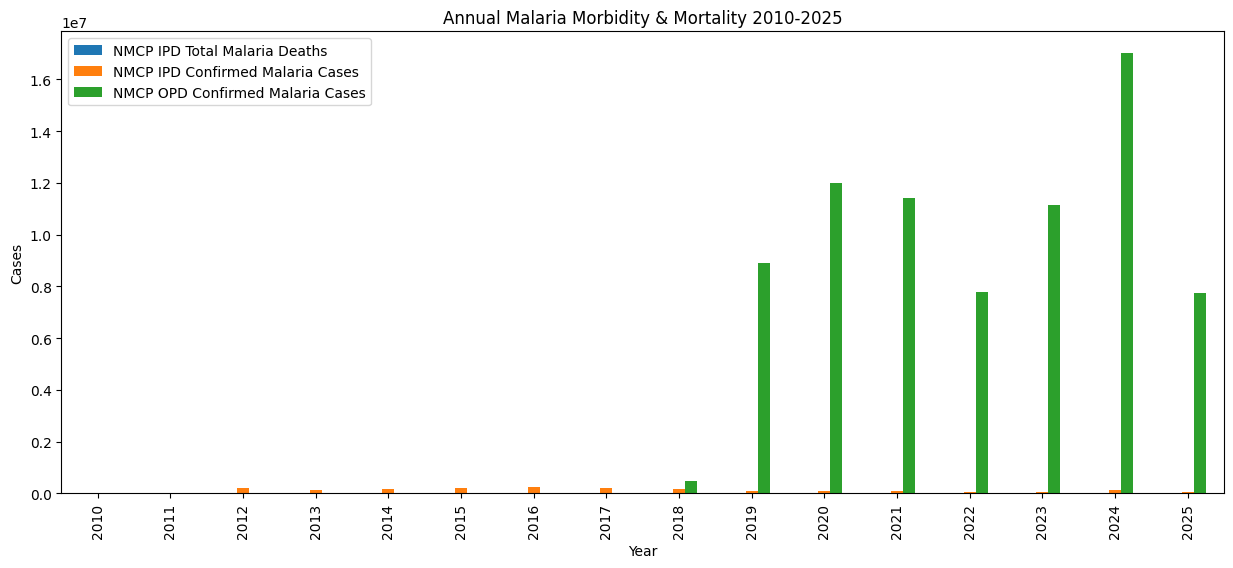

In [22]:
yearly_cases.plot(x="Year", y=["NMCP IPD Total Malaria Deaths", "NMCP IPD Confirmed Malaria Cases", "NMCP OPD Confirmed Malaria Cases"], kind="bar", figsize=(15,6))
plt.title("Annual Malaria Morbidity & Mortality 2010-2025")
plt.ylabel("Cases")
plt.show()

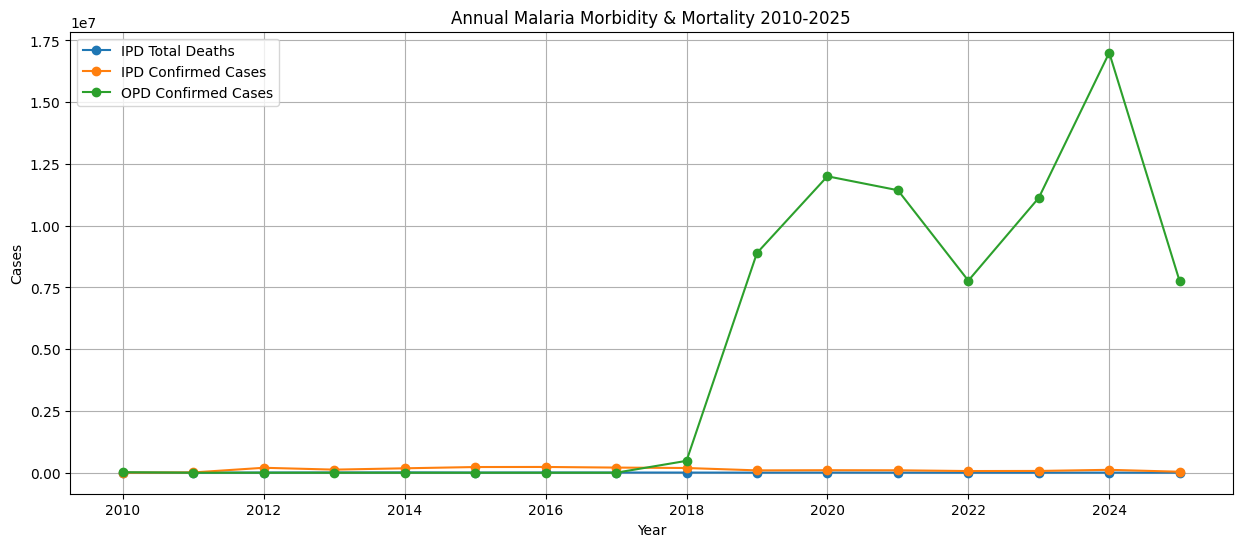

In [23]:
plt.figure(figsize=(15,6))

# Plot each column as a line
plt.plot(yearly_cases["Year"], yearly_cases["NMCP IPD Total Malaria Deaths"], marker='o', label="IPD Total Deaths")
plt.plot(yearly_cases["Year"], yearly_cases["NMCP IPD Confirmed Malaria Cases"], marker='o', label="IPD Confirmed Cases")
plt.plot(yearly_cases["Year"], yearly_cases["NMCP OPD Confirmed Malaria Cases"], marker='o', label="OPD Confirmed Cases")

plt.title("Annual Malaria Morbidity & Mortality 2010-2025")
plt.xlabel("Year")
plt.ylabel("Cases")
plt.legend()
plt.grid(True)
plt.show()

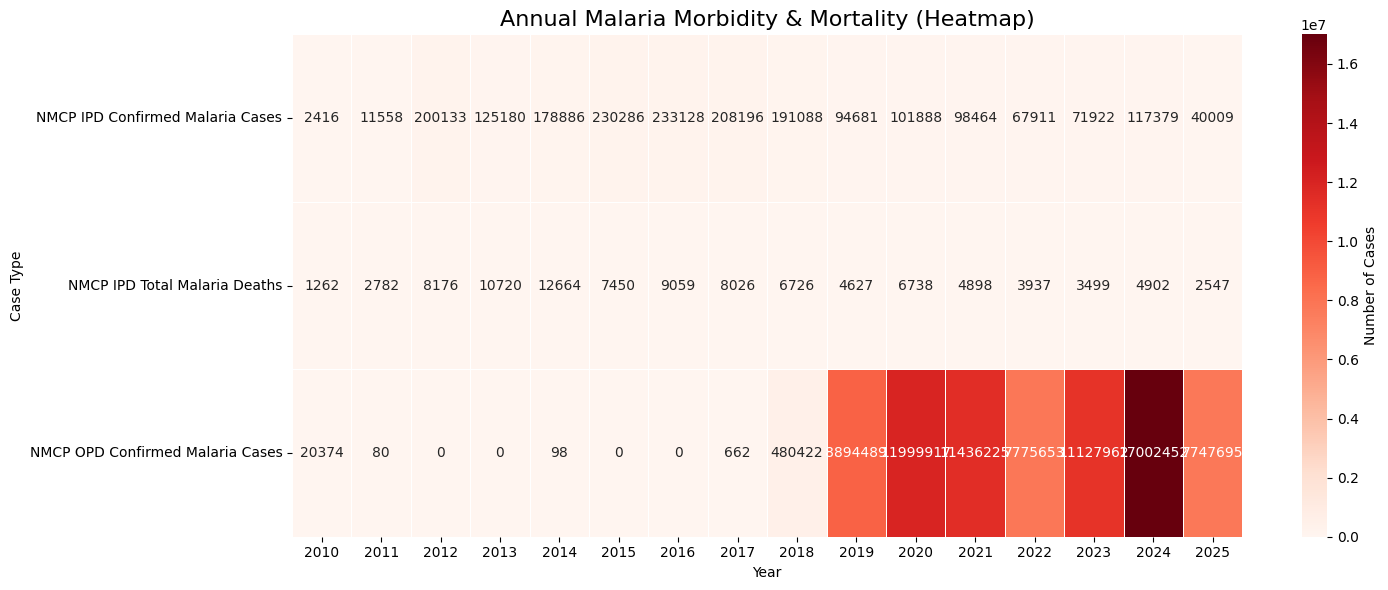

In [34]:
heatmap_data = yearly_cases[['Year', 
                             'NMCP IPD Total Malaria Deaths', 
                             'NMCP IPD Confirmed Malaria Cases', 
                             'NMCP OPD Confirmed Malaria Cases',
                             ]]

# Reshape: rows = Case Types, columns = Year, values = counts
heatmap_data = heatmap_data.melt(id_vars='Year', 
                                 var_name='Case_Type', 
                                 value_name='Cases')

heatmap_pivot = heatmap_data.pivot(index='Case_Type', columns='Year', values='Cases')

# Plot heatmap
plt.figure(figsize=(15,6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar_kws={'label':'Number of Cases'})

plt.title("Annual Malaria Morbidity & Mortality (Heatmap)", fontsize=16)
plt.xlabel("Year")
plt.ylabel("Case Type")
plt.tight_layout()
plt.show()

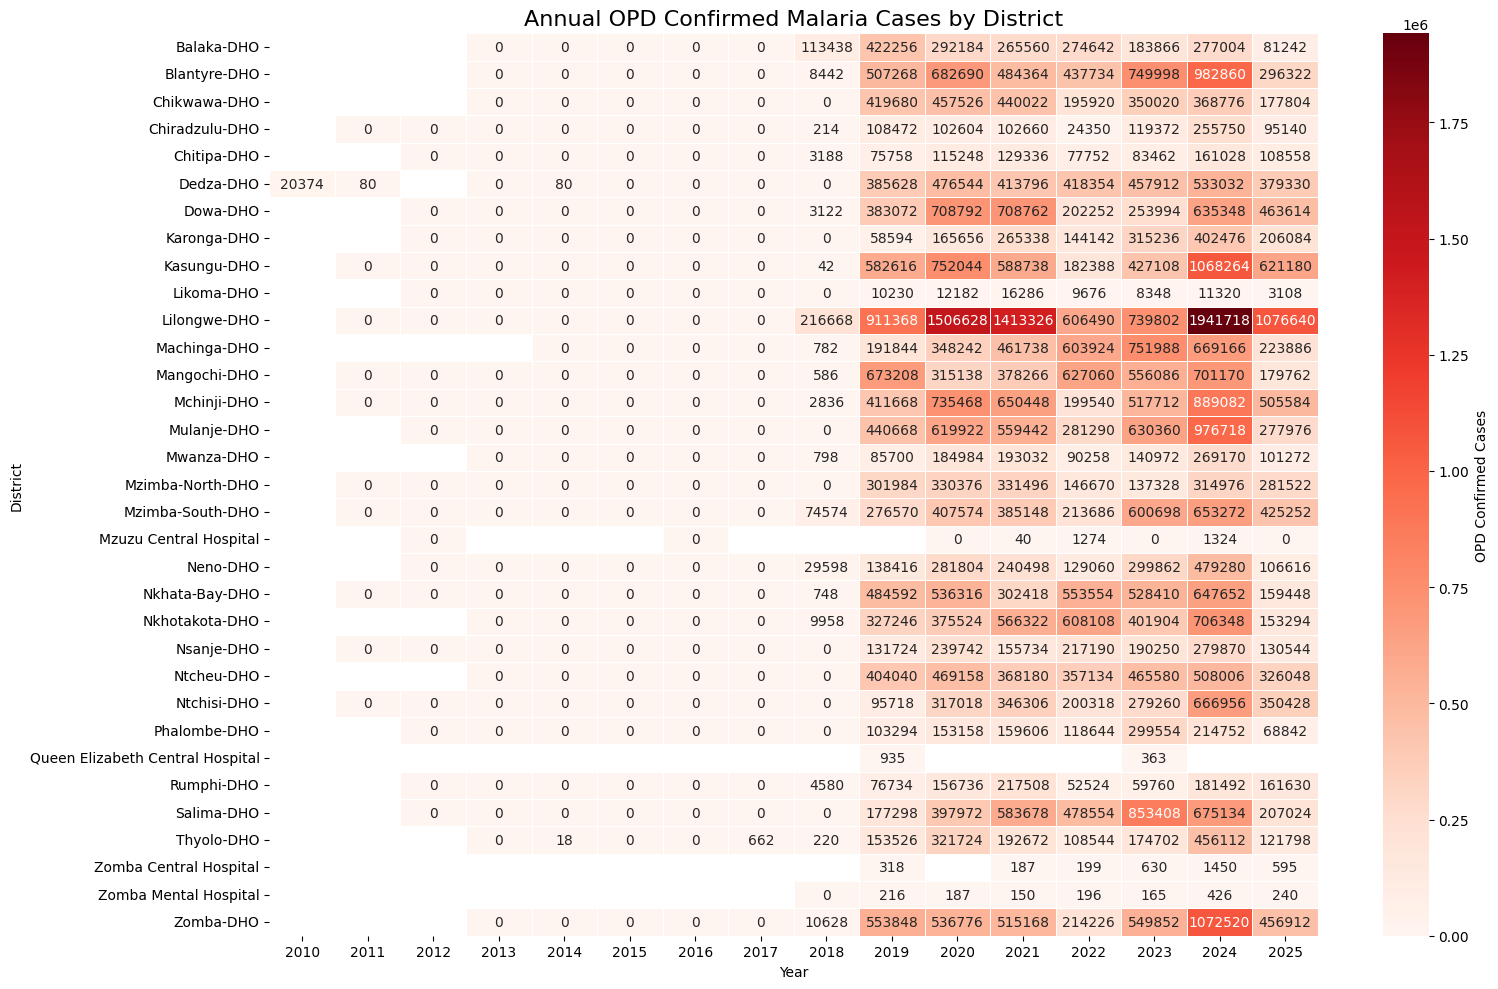

In [31]:
# Pivot so rows = districts, columns = years, values = cases
heatmap_data = df_merged_incidence.groupby(['orgunitlevel3','Year'])['NMCP OPD Confirmed Malaria Cases'].sum().reset_index()

heatmap_pivot = heatmap_data.pivot(index='orgunitlevel3', columns='Year', values='NMCP OPD Confirmed Malaria Cases')

plt.figure(figsize=(16,10))
sns.heatmap(heatmap_pivot, annot=True, fmt=".0f", cmap="Reds", linewidths=0.5, cbar_kws={'label':'OPD Confirmed Cases'})
plt.title("Annual OPD Confirmed Malaria Cases by District", fontsize=16)
plt.xlabel("Year")
plt.ylabel("District")
plt.tight_layout()
plt.show()
